In [2]:
!pip install SpeechRecognition

   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/32.8 MB 1.8 MB/s eta 0:00:19
   ---------------------------------------- 0.1/32.8 MB 1.8 MB/s eta 0:00:19
   ---------------------------------------- 0.2/32.8 MB 1.1 MB/s eta 0:00:32
   ---------------------------------------- 0.2/32.8 MB 1.1 MB/s eta 0:00:32
   ---------------------------------------- 0.2/32.8 MB 919.0 kB/s eta 0:00:36
   ---------------------------------------- 0.2/32.8 MB 801.7 kB/s eta 0:00:41
   ---------------------------------------- 0.2/32.8 MB 801.7 kB/s eta 0:00:41
   ---------------------------------------- 0.3/32.8 MB 708.9 kB/s eta 0:00:46
   ---------------------------------------- 0.3/32.8 MB 708.9 kB/s eta 0:00:46
   --------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import os
import librosa
import json
import numpy as np
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pydub import AudioSegment
# import google.cloud.speech as speech
import soundfile
import speech_recognition as sr
from pydub import AudioSegment
from tensorflow.keras.models import load_model

In [2]:
dataset = "D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha"
json_file = "data00000.json"
sample_rate = 22050
n_mfcc = 13
n_fft = 2048
hop_length = 512
expected_mfcc_vectors_per_segment = 1499  # Fixed MFCC length

# Initialize the data structure
data = {
    "mapping": [],
    "mfcc": [],
    "labels": []
}

# Function to process audio files and save MFCC features
def save_mfcc(dataset, json_file, n_mfcc=13, n_fft=2048, hop_length=512):
    shape0 = n_mfcc
    max_shape1 = expected_mfcc_vectors_per_segment

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset)):
        if dirpath != dataset:
            # Extract label
            dirpath_components = dirpath.split("\\")
            label = dirpath_components[-1]
            data["mapping"].append(label)
            print("\nProcessing {}".format(label))

            # Loop through files in the directory
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                print(f'file_path : {file_path}')
                signal, sr = librosa.load(file_path, sr=sample_rate)

                # Extract MFCCs for the entire signal
                mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, n_mfcc=n_mfcc, hop_length=hop_length)

                # Pad or truncate MFCC to match the fixed length
                arr = np.zeros((shape0, max_shape1))  # Pre-initialize with zeros
                mfcc_length = mfcc.shape[1]
                print(f'Original MFCC shape: {mfcc.shape}')

                if mfcc_length < max_shape1:
                    # Pad MFCC if it is shorter
                    arr[:, :mfcc_length] = mfcc
                    print(f'Padded MFCC shape: {arr.shape}')
                else:
                    # Truncate MFCC if it is longer
                    arr = mfcc[:, :max_shape1]
                    print(f'Truncated MFCC shape: {arr.shape}')

                # Transpose MFCC for consistency (time steps as rows)
                mfcc = arr.T
                print(f'Transposed MFCC shape: {mfcc.shape}')

                # Store the MFCCs and corresponding label
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i - 1)

                print()

    # Save the data to a JSON file
    with open(json_file, "w") as fp:
        json.dump(data, fp, indent=4)


# Main execution
if __name__ == "__main__":
    save_mfcc(dataset, json_file)


Processing verse_number_1
file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\abdul-basit.wav
Original MFCC shape: (13, 187)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Abdullaah_3awwaad_Al-Juhaynee_128kbps.wav
Original MFCC shape: (13, 141)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\abdullah-awwaad.wav
Original MFCC shape: (13, 141)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Abdullah_Basfar_192kbps.wav
Original MFCC shape: (13, 240)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_pa

Original MFCC shape: (13, 257)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Hudhaify_64kbps.wav
Original MFCC shape: (13, 303)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Husary_128kbps.wav
Original MFCC shape: (13, 221)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Husary_128kbps_Mujawwad.wav
Original MFCC shape: (13, 449)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Husary_64kbps.wav
Original MFCC shape: (13, 221)
Padded MFCC shape: (13, 

Original MFCC shape: (13, 402)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Nabil_Rifa3i_48kbps.wav
Original MFCC shape: (13, 155)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\nasser-alqatami.wav
Original MFCC shape: (13, 145)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\Nasser_Alqatami_128kbps.wav
Original MFCC shape: (13, 145)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_1\parhizgar.wav
Original MFCC shape: (13, 421)
Padded MFCC shape: (13,

Original MFCC shape: (13, 239)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\Alafasy_64kbps.wav
Original MFCC shape: (13, 241)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\alajamy.wav
Original MFCC shape: (13, 199)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\alfasay.wav
Original MFCC shape: (13, 241)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\Ali_Hajjaj_AlSuesy_128kbps.wav
Original MFCC shape: (13, 209)
Padded MFCC shape: (13, 1499)
Trans

Original MFCC shape: (13, 241)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\Mohammad_al_Tablaway_128kbps.wav
Original MFCC shape: (13, 259)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\Mohammad_al_Tablaway_64kbps.wav
Original MFCC shape: (13, 258)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\muhammad-abdulkareem.wav
Original MFCC shape: (13, 187)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_2\muhammad-ayyoub.wav
Original MFCC shape: (13, 298)

Original MFCC shape: (13, 374)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Abdul_Basit_Murattal_192kbps.wav
Original MFCC shape: (13, 174)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Abdul_Basit_Murattal_64kbps.wav
Original MFCC shape: (13, 173)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Abdurrahmaan_As-Sudais_192kbps.wav
Original MFCC shape: (13, 134)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Abdurrahmaan_As-Sudais_64kbps.wav
Origin

Original MFCC shape: (13, 435)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Khaalid_Abdullaah_al-Qahtaanee_192kbps.wav
Original MFCC shape: (13, 183)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\khalefa_al_tunaiji_64kbps.wav
Original MFCC shape: (13, 210)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\khalid-abdullaah.wav
Original MFCC shape: (13, 183)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\maher-almuaiqly.wav
Original MFCC shape: (13, 

Original MFCC shape: (13, 196)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Saood_ash-Shuraym_128kbps.wav
Original MFCC shape: (13, 137)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Saood_ash-Shuraym_64kbps.wav
Original MFCC shape: (13, 136)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\yaser-salamah.wav
Original MFCC shape: (13, 155)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_3\Yaser_Salamah_128kbps.wav
Original MFCC shape: (13, 155)
Padded

Original MFCC shape: (13, 152)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Hani_Rifai_192kbps.wav
Original MFCC shape: (13, 123)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Hani_Rifai_64kbps.wav
Original MFCC shape: (13, 120)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Hudhaify_128kbps.wav
Original MFCC shape: (13, 251)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Hudhaify_32kbps.wav
Original MFCC shape: (13, 244)
Padded MFCC shape: (13,

Original MFCC shape: (13, 208)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Muhammad_Jibreel_128kbps.wav
Original MFCC shape: (13, 147)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Muhammad_Jibreel_64kbps.wav
Original MFCC shape: (13, 144)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\muhsin-alqasim.wav
Original MFCC shape: (13, 150)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_4\Muhsin_Al_Qasim_192kbps.wav
Original MFCC shape: (13, 150)
Padde

Original MFCC shape: (13, 226)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\akram-alalaqimy.wav
Original MFCC shape: (13, 308)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Akram_AlAlaqimy_128kbps.wav
Original MFCC shape: (13, 308)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Alafasy_128kbps.wav
Original MFCC shape: (13, 287)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Alafasy_64kbps.wav
Original MFCC shape: (13, 290)
Padded MFCC shape: (13

Original MFCC shape: (13, 246)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Menshawi_16kbps.wav
Original MFCC shape: (13, 219)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Menshawi_32kbps.wav
Original MFCC shape: (13, 251)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Minshawy_Mujawwad_192kbps.wav
Original MFCC shape: (13, 643)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_5\Minshawy_Mujawwad_64kbps.wav
Original MFCC shape: (13, 641)
Padded MFC

Original MFCC shape: (13, 194)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Abdullah_Basfar_192kbps.wav
Original MFCC shape: (13, 238)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Abdullah_Basfar_32kbps.wav
Original MFCC shape: (13, 253)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Abdullah_Basfar_64kbps.wav
Original MFCC shape: (13, 234)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Abdullah_Matroud_128kbps.wav
Original MFCC shape: (13, 172

Original MFCC shape: (13, 264)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Hudhaify_64kbps.wav
Original MFCC shape: (13, 255)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Husary_128kbps.wav
Original MFCC shape: (13, 231)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Husary_128kbps_Mujawwad.wav
Original MFCC shape: (13, 472)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Husary_64kbps.wav
Original MFCC shape: (13, 230)
Padded MFCC shape: (13, 

Original MFCC shape: (13, 221)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Nabil_Rifa3i_48kbps.wav
Original MFCC shape: (13, 133)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\nasser-alqatami.wav
Original MFCC shape: (13, 229)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\Nasser_Alqatami_128kbps.wav
Original MFCC shape: (13, 229)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_6\parhizgar.wav
Original MFCC shape: (13, 167)
Padded MFCC shape: (13,

Original MFCC shape: (13, 672)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\Alafasy_128kbps.wav
Original MFCC shape: (13, 568)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\Alafasy_64kbps.wav
Original MFCC shape: (13, 571)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\alajamy.wav
Original MFCC shape: (13, 722)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\alfasay.wav
Original MFCC shape: (13, 571)
Padded MFCC shape: (13, 1499)
Transposed MFCC 

Original MFCC shape: (13, 561)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\Menshawi_32kbps.wav
Original MFCC shape: (13, 544)
Padded MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\Minshawy_Mujawwad_192kbps.wav
Original MFCC shape: (13, 1501)
Truncated MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\Minshawy_Mujawwad_64kbps.wav
Original MFCC shape: (13, 1499)
Truncated MFCC shape: (13, 1499)
Transposed MFCC shape: (1499, 13)

file_path : D:/كتب/Graduation project/new data/Quran Files Downloader/Quran Audio Files (WAV)/Al-Fatiha\verse_number_7\Minshawy_Murattal_128kbps.wav
Original MFCC shape: (1

In [5]:
dataset = "data00000.json"

def load_data(dataset):

    with open(dataset, "r") as f:
        data =  json.load(f)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    Z = np.array(data["mapping"])

    return X,y,Z

In [7]:
print(f'the X.shape is : {X.shape}')
print(f'the y.shape is : {y.shape}')
print(f'the Z.shape is : {Z.shape}')

the X.shape is : (617, 1499, 13)
the y.shape is : (617,)
the Z.shape is : (7,)


In [15]:
test_size= 0.15
validation_size=0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [16]:
print(f'the X_train.shape is : {X_train.shape}')
print(f'the X_test.shape is : {X_test.shape}')
print(f'the y_train.shape is : {y_train.shape}')
print(f'the y_test.shape is : {y_test.shape}')
print(f'the X_validation.shape is : {X_validation.shape}')
print(f'the y_validation.shape is : {y_validation.shape}')

the X_train.shape is : (471, 1499, 13, 1)
the X_test.shape is : (93, 1499, 13, 1)
the y_train.shape is : (471,)
the y_test.shape is : (93,)
the X_validation.shape is : (53, 1499, 13, 1)
the y_validation.shape is : (53,)


In [17]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

model = tf.keras.Sequential()

#1st
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape,padding='same'))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
model.add(tf.keras.layers.BatchNormalization())

#2nd
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding='same'))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
model.add(tf.keras.layers.BatchNormalization())

#3rd
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu",padding='same'))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
model.add(tf.keras.layers.BatchNormalization())

#4th
model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu",padding = 'same'))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
model.add(tf.keras.layers.BatchNormalization())


#flatten layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

#output
model.add(tf.keras.layers.Dense(7,activation="softmax"))


In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Train the model and save training history
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=16, epochs=35)


Epoch 1/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 393ms/step - accuracy: 0.2679 - loss: 1.9156 - val_accuracy: 0.2453 - val_loss: 1.8289
Epoch 2/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 376ms/step - accuracy: 0.4718 - loss: 1.3554 - val_accuracy: 0.2453 - val_loss: 1.7115
Epoch 3/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.6274 - loss: 1.0883 - val_accuracy: 0.4906 - val_loss: 1.5285
Epoch 4/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 374ms/step - accuracy: 0.6786 - loss: 0.8096 - val_accuracy: 0.5660 - val_loss: 1.3763
Epoch 5/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 381ms/step - accuracy: 0.8213 - loss: 0.5740 - val_accuracy: 0.6415 - val_loss: 1.3375
Epoch 6/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.8499 - loss: 0.4305 - val_accuracy: 0.7547 - val_loss: 1.1779
Epoch 7/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.9177 - loss: 0.2823 - val_accuracy: 0.7925 - val_loss: 0.8961
Epoch 8/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.9607 - loss: 0.1595 - val_accu

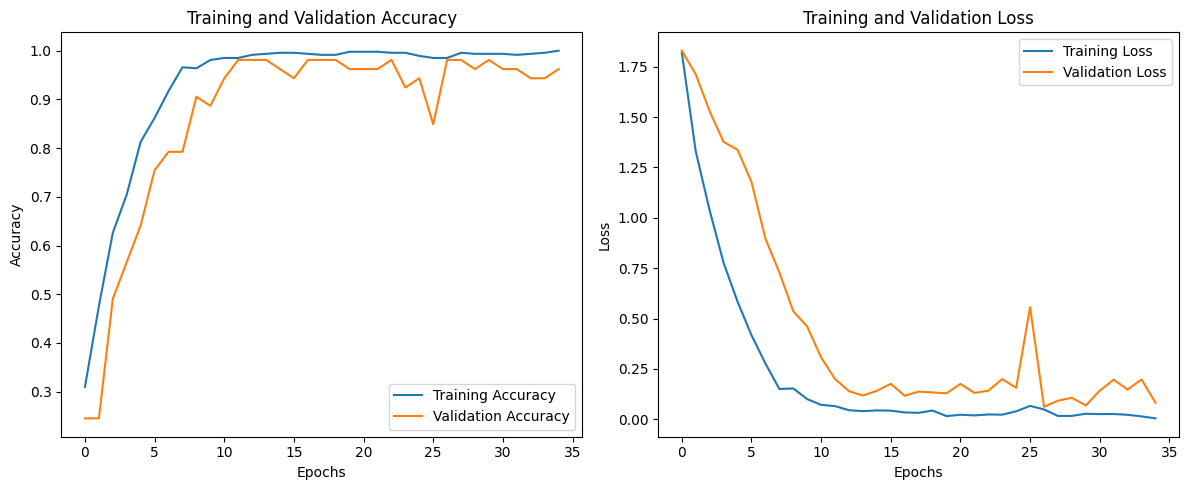

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#
##train the network
#model.fit(X_train, y_train, validation_data=(X_validation,y_validation),batch_size=16,epochs=30)
#
## optimizer = tf.keras.optimizers.Adam(learning_rate=0.000004)
#model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#
##train the network
#model.fit(X_train, y_train, validation_data=(X_validation,y_validation),batch_size=16,epochs=15)

Epoch 1/20
30/30 [==============================] - 12s 366ms/step - loss: 1.8845 - accuracy: 0.2951 - val_loss: 1.8240 - val_accuracy: 0.2264
Epoch 2/20
30/30 [==============================] - 13s 442ms/step - loss: 1.4234 - accuracy: 0.4352 - val_loss: 1.6097 - val_accuracy: 0.3208
Epoch 3/20
30/30 [==============================] - 11s 372ms/step - loss: 1.1415 - accuracy: 0.5520 - val_loss: 1.5201 - val_accuracy: 0.4528
Epoch 4/20
30/30 [==============================] - 11s 363ms/step - loss: 0.8683 - accuracy: 0.6964 - val_loss: 1.3962 - val_accuracy: 0.4340
Epoch 5/20
30/30 [==============================] - 11s 365ms/step - loss: 0.6222 - accuracy: 0.7771 - val_loss: 1.2787 - val_accuracy: 0.5094
Epoch 6/20
30/30 [==============================] - 11s 375ms/step - loss: 0.4774 - accuracy: 0.8493 - val_loss: 1.1780 - val_accuracy: 0.6604
Epoch 7/20
30/30 [==============================] - 11s 363ms/step - loss: 0.3106 - accuracy: 0.9193 - val_loss: 0.9791 - val_accuracy: 0.7358

In [20]:
model.save("my_model.h5")

In [13]:
model = load_model('new_model.h5')

C:\Users\mohamed salah\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.9629 - loss: 0.1829
Test Accuracy: 95.70%


In [30]:
exp = 7
shape0 = 13
max_shape1 = 1499
signal, sr =librosa.load('verse-number 2 test.wav',sr=22050)

print(f'signal : {signal}')
print(f'sr : {sr}')

mfcc = librosa.feature.mfcc(y=signal,
                            sr=sr,
                            n_fft=2048,
                            n_mfcc=13,
                            hop_length=512
                            )

print(f'mfcc : {mfcc.shape}')

# Ensure the MFCC has the same shape as expected by the model (e.g., 512 time steps)
expected_length = 1499


arr = np.zeros((shape0, max_shape1))  # Pre-initialize with zeros
mfcc_length = mfcc.shape[1]
print(f'Original MFCC shape: {mfcc.shape}')

if mfcc_length < max_shape1:
    # Pad MFCC if it is shorter
    arr[:, :mfcc_length] = mfcc
    print(f'Padded MFCC shape: {arr.shape}')
else:
    # Truncate MFCC if it is longer
    arr = mfcc[:, :max_shape1]
    print(f'Truncated MFCC shape: {arr.shape}')

# Transpose MFCC for consistency (time steps as rows)
mfcc = arr.T

print(f'mfcc after transpose : {mfcc.shape}')

print()
print()

mfcc = mfcc[..., np.newaxis]
print(mfcc.shape)
print()



X= mfcc[np.newaxis,...]
print(X.shape)
prediction = model.predict(X)
print(prediction)
index=np.argmax(prediction,axis=1)
predicted=Z[index]
print("Expected: {} and predicted: {}".format(y, index+1))

signal : [ 8.7311491e-11 -3.3469405e-10 -7.2759576e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
sr : 22050
mfcc : (13, 320)
Original MFCC shape: (13, 320)
Padded MFCC shape: (13, 1499)
mfcc after transpose : (1499, 13)


(1499, 13, 1)

(1, 1499, 13, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[7.6333218e-04 2.7121559e-01 3.1660215e-03 1.8138494e-04 7.1888071e-01
  7.7992317e-04 5.0131134e-03]]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [23]:
import speech_recognition as sr

verse_number_1='بسم الله الرحمن الرحيم'
verse_number_2='الحمد لله رب العالمين'
verse_number_3='الرحمن الرحيم'
verse_number_4='مالك يوم الدين'
verse_number_5='اياك نعبد واياك نستعين'
verse_number_6='اهدنا الصراط المستقيم'
verse_number_7='صراط الذين انعمت عليهم غير المغضوب عليهم ولا الضالين'

test=[]
if(predicted==['verse_number_1']):
    verse_number_1=verse_number_1.strip()
    verse_number_1=verse_number_1.replace('.','')
    verse_number_1=verse_number_1.split()
    test=verse_number_1

if(predicted==['verse_number_2']):
    verse_number_2=verse_number_2.strip()
    verse_number_2=verse_number_2.replace('.','')
    verse_number_2=verse_number_2.split()
    test=verse_number_2

if(predicted==['verse_number_3']):
    verse_number_3=verse_number_3.strip()
    verse_number_3=verse_number_3.replace('.','')
    verse_number_3=verse_number_3.split()
    test=verse_number_3

if(predicted==['verse_number_4']):
    verse_number_4=verse_number_4.strip()
    verse_number_4=verse_number_4.replace('.','')
    verse_number_4=verse_number_4.split()
    test=verse_number_4

if(predicted==['verse_number_5']):
    verse_number_5=verse_number_5.strip()
    verse_number_5=verse_number_5.replace('.','')
    verse_number_5=verse_number_5.split()
    test=verse_number_5

if(predicted==['verse_number_6']):
    verse_number_6=verse_number_6.strip()
    verse_number_6=verse_number_6.replace('.','')
    verse_number_6=verse_number_6.split()
    test=verse_number_6

if(predicted==['verse_number_7']):
    verse_number_7=verse_number_7.strip()
    verse_number_7=verse_number_7.replace('.','')
    verse_number_7=verse_number_7.split()
    test=verse_number_7


extracted_features=[]

audio_file_path = 'mashary rashed verse_number_2.wav'

sound = AudioSegment.from_wav(audio_file_path)
sound = sound.set_channels(1)
audio_for_wav = "mashary rashed verse_number_2.wav"
sound.export(audio_for_wav, format="wav")

# Speech recognition using speech_recognition library
recognizer = sr.Recognizer()
with sr.AudioFile(audio_for_wav) as source:
    audio = recognizer.record(source)

try:
    # Recognize speech using Google Web Speech API (language: Arabic)
    transcript = recognizer.recognize_google(audio, language="ar-SA")

    # Keep the structure of the extracted features list
    extracted_features.append(transcript)
    extracted_features = "".join(extracted_features).strip().split()
#     extracted_features=extracted_features.replace('.','')

except sr.UnknownValueError:
    print("Could not understand the audio")
except sr.RequestError as e:
    print(f"Google Speech Recognition error: {e}")

# Return the recognized text and features
print(extracted_features)

['الحمد', 'لله', 'رب', 'العالمين']


In [5]:
test = ['الحمد', 'لله', 'رب', 'العالمين']
extracted_features = ['الحمد', 'لله', 'ربي', 'العالمين']

# Check if the number of words in each string is the same
if len(test) != len(extracted_features):
    print("Incorrect Recitation")
else:
# Check if the sequence of words is the same
    if test == extracted_features:
        print("Correct Recitation")
    else:
    # Check if the words are the same, regardless of their order
        set1 = set(test)
        set2 = set(extracted_features)
        if set1 == set2:
            print("The words are recited correctly, but in different order.")
        else:
            for i in range(len(test)):
                if test[i] != extracted_features[i]:
                    print(f"The words at index {i} are different.")
                    print(f"The word incorrectly recited is:{test[i]}")

The words at index 2 are different.
The word incorrectly recited is:رب
